<a href="https://colab.research.google.com/github/AshishGtmMishra/ML-SM-projects-and-tutorials/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Support Vector Machines for Classification and Regression**

In this Jupyter Notebook, we delve into the comprehensive exploration of Support Vector Machines (SVMs) for both classification and regression tasks. The implementation utilizes the SVM module provided by Scikit-Learn, a powerful library for machine learning in Python.

The datasets featured in this notebook are carefully selected from the extensive collection available in Scikit-Learn's datasets library. Additionally, for regression purposes, a unique dataset is generated using the  random function from NumPy.

*Overview of the Tutorial:*

This tutorial is made with beginners in mind, offering a line-by-line explanation of essential code segments. Whether you are new to SVMs or seeking a refresher, this tutorial provides a solid foundation for understanding and applying Support Vector Machines in your machine learning projects.

Reference: [Hands-on Machine Learning O'Reilly book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)



### Setup

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Linear SVM Classification

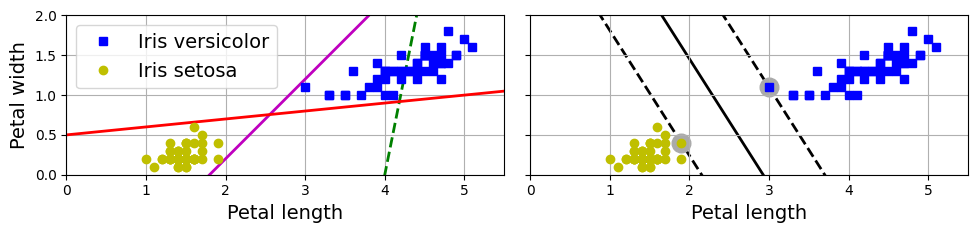

In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier Model
svm_clf = SVC(kernel = "linear", C = 1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0] / w[1] * x0 - b / w[1]

  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  svs = svm_clf.support_vectors_

  plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
  plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
  plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
  plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
              zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

### Code Explanation Line-by-Line:

**1. Imports:**

- `import numpy as np`: Imports the `numpy` library for mathematical operations.
- `from sklearn.svm import SVC`: Imports the `SVC` class for Support Vector Machine classification from the `sklearn.svm` module.
- `from sklearn import datasets`: Imports the `datasets` module from `sklearn` for accessing datasets.

**2. Load Iris Dataset:**

- `iris = datasets.load_iris(as_frame = True)`: Loads the Iris dataset and stores it in the `iris` variable. The `as_frame=True` option converts the data to a Pandas DataFrame.

**3. Select Features and Target:**

- `X = iris.data[["petal length (cm)", "petal width (cm)"]].values`: Extracts the columns "petal length (cm)" and "petal width (cm)" from the `iris.data` DataFrame and converts them to a NumPy array. This stores the feature vectors in the `X` variable.
- `y = iris.target`: Extracts the target values (species labels) from the `iris.target` attribute and stores them in the `y` variable.

**4. Filter Setosa and Versicolor Iris:**

- `setosa_or_versicolor = (y == 0) | (y == 1)`: Creates a mask that identifies Iris setosa (class 0) and Iris versicolor (class 1) data points.
- `X = X[setosa_or_versicolor]`: Filters the `X` matrix based on the mask, keeping only data points belonging to Iris setosa and Iris versicolor.
- `y = y[setosa_or_versicolor]`: Similarly, filters the `y` vector based on the same mask.

**5. Define and Train SVM Model:**

- `svm_clf = SVC(kernel = "linear", C = 1e100)`: Defines an SVM classifier with a linear kernel and a very large regularization parameter (C). This enforces a large margin for classification.
- `svm_clf.fit(X, y)`: Trains the SVM model using the `X` features and `y` target labels.

**6. Define Bad Models:**

- Three functions `pred_1`, `pred_2`, and `pred_3` define linear equations representing various bad models. These models do not capture the true separation boundary between Iris setosa and Iris versicolor.

**7. Function for Plotting Decision Boundary:**

- `def plot_svc_decision_boundary(svm_clf, xmin, xmax)`: This function takes an SVM model, minimum x value (xmin), and maximum x value (xmax) as input.
    - It calculates the decision boundary equation based on the SVM model's weight vector and intercept.
    - It plots the decision boundary, margin lines, and support vectors on a graph.

**8. Visualization:**

- `fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)`: Creates a figure with two subplots for side-by-side comparison.
- Subplot 1:
    - Plots the data points and the bad models' predictions.
    - Labels the axes and adds legend.
- Subplot 2:
    - Calls the `plot_svc_decision_boundary` function to plot the SVM model's decision boundary, margin lines, and support vectors.
- `plt.show()`: Displays the final plot with both subplots.

**9. Saving the Figure:**

- `save_fig("large_margin_classification_plot")`: Saves the figure as an image file named "large_margin_classification_plot.png".

Illustrates how a large-margin SVM can achieve effective classification compared to simple linear models by maximizing the margin between the decision boundary and the supporting data points.


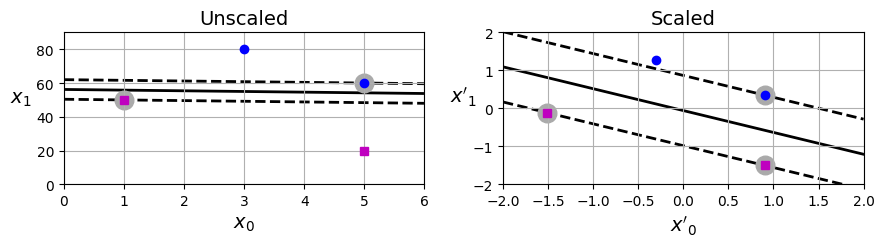

In [6]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel = "linear", C = 100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel = "linear", C = 100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

### Soft Margin Classifier

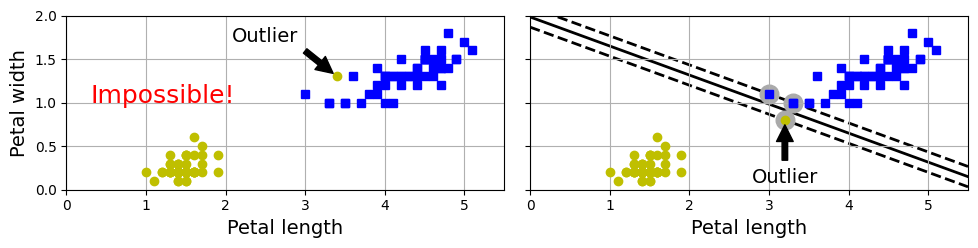

In [7]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

svm_clf2 = SVC(kernel = "linear", C = 10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols = 2,  figsize = (10, 2.7), sharey = True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

In [8]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

iris = datasets.load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris Virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C = 1, dual = True, random_state = 42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [9]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [10]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

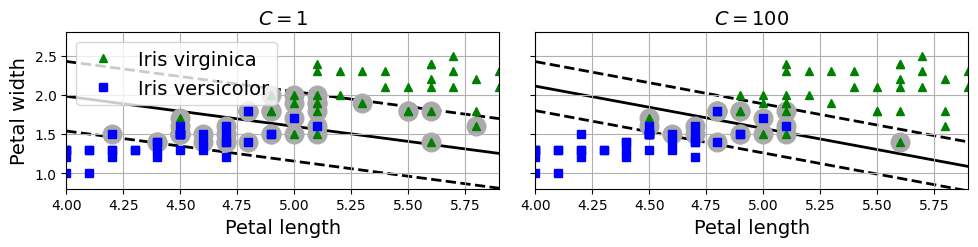

In [11]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, max_iter = 10_000, dual = True, random_state = 42)
svm_clf2 = LinearSVC(C = 100, max_iter = 10_000, dual = True, random_state = 42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscale parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Finding the support Vectors
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

### Non-Linear SVM Classification

Sometimes the datset is not linearly seperable so we can make it linearly seperable by adding extra features to the dataset. This is shown in the example below:

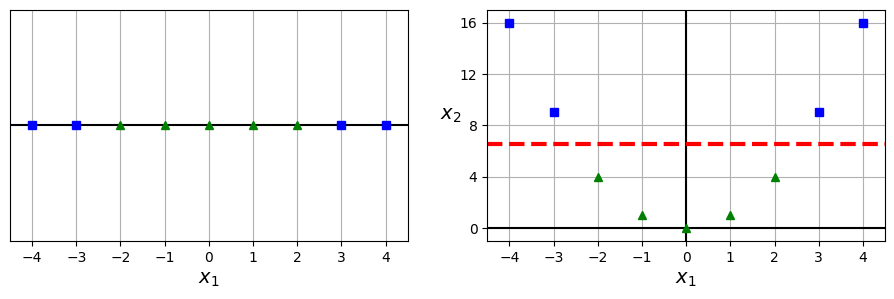

In [12]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

Here the dataset was not linearly seperable first but when we added an extra feature that is X2 = X1^2 the data became linearly seperable.


In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 100, max_iter = 10_000, dual = True, random_state = 42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=100, max_iter=10000, random_state=42))])

- `from sklearn.datasets import make_moons`: This imports the `make_moons` function from the `sklearn.datasets` module, which can generate a toy dataset of two interleaving half circles (moons).

- `from sklearn.preprocessing import PolynomialFeatures`: This imports the `PolynomialFeatures` class from the `sklearn.preprocessing` module, which can create polynomial and interaction features from the original features.

- `X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)`: This calls the `make_moons` function with the specified parameters and assigns the generated samples and labels to `X` and `y` respectively. `n_samples` is the total number of points, `noise` is the standard deviation of Gaussian noise added to the data, and `random_state` is the seed for the random number generator.

- `polynomial_svm_clf = make_pipeline(`: This creates a pipeline object that can chain multiple estimators into a single model. The pipeline will apply each estimator in sequence to the input data and pass the output to the next estimator, until the final estimator produces the prediction. The pipeline can also handle caching, fitting, transforming, and scoring of the data.

- `PolynomialFeatures(degree = 3),`: This adds a `PolynomialFeatures` transformer to the pipeline, which will generate all polynomial combinations of the features with degree less than or equal to 3. For example, if the input features are `[a, b]`, the output features will be `[1, a, b, a^2, ab, b^2, a^3, a^2b, ab^2, b^3]`. This can help capture the non-linear relationships between the features and the target variable.

- `StandardScaler(),`: This adds a `StandardScaler` transformer to the pipeline, which will standardize the features by removing the mean and scaling to unit variance. This can help improve the performance and convergence of some machine learning algorithms, such as linear models and gradient descent methods.

- `LinearSVC(C = 100, max_iter = 10_000, dual = True, random_state = 42)`: This adds a `LinearSVC` estimator to the pipeline, which will perform linear support vector machine classification on the transformed features. `C` is the regularization parameter that controls the trade-off between margin size and misclassification penalty, `max_iter` is the maximum number of iterations for the solver, `dual` is whether to use the dual or primal formulation of the optimization problem, and `random_state` is the seed for the random number generator.

- `)`: This closes the parenthesis for the `make_pipeline` function.

- `polynomial_svm_clf.fit(X, y)`: This fits the pipeline model to the data `X` and the labels `y`. This will apply each transformer in the pipeline to `X` and pass the output to the next transformer, until the final estimator receives the transformed features and fits a linear SVM model to them. The fitted model can then be used to make predictions on new data.


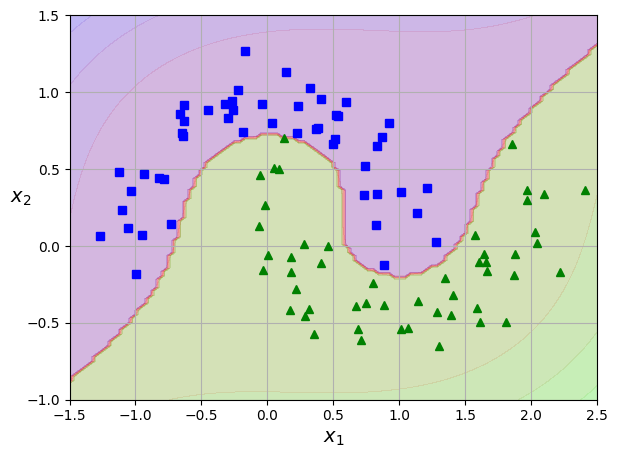

In [14]:
def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)

def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
  plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

```python
def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)
```

- The first function, `plot_dataset`, takes three arguments: `X`, `y`, and `axes`. `X` is a 2D array of feature vectors, `y` is a 1D array of class labels, and `axes` is a list of four values that define the x and y limits of the plot. The function then plots the data points with different colors and shapes depending on their class (`bs` for blue squares and `g^` for green triangles). It also sets the axis labels, grid, and range using the `plt` (matplotlib.pyplot) module.

```python
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
  plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)
```
- The second function, `plot_predictions`, takes two arguments: `clf` and `axes`. `clf` is a trained SVM classifier object, and `axes` is the same as before. The function then creates a grid of points using `np.linspace` and `np.meshgrid` from the numpy library. It then uses the `clf.predict` and `clf.decision_function` methods to get the predicted class and the decision score for each point in the grid. It then plots the prediction and the decision regions using `plt.contourf` with different color maps (`plt.cm.brg` for blue-red-green) and transparency levels (`alpha`).

```python
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
```
- The next two lines call the `plot_predictions` and `plot_dataset` functions with the `polynomial_svm_clf` object and the `[-1.5, 2.5, -1, 1.5]` list as arguments. This creates a plot that shows how the polynomial SVM classifier separates the two classes of the moons dataset with a curved decision boundary and a wide margin.

- The next line calls the `save_fig` function with the `"moons_polynomial_svc_plot"` argument. This function is defined earlier in the web page context, and it saves the current figure as an image file with the given name.

- The last line calls the `plt.show` function, which displays the plot on the screen.


### Polynomial Kernel

In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])


- `from sklearn.svm import SVC`: This line imports the SVC class from the sklearn.svm module. SVC stands for Support Vector Classification and is a class that implements the C-Support Vector Machine algorithm for classification tasks¹.

- `poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))`: This line creates a pipeline object that combines two steps: StandardScaler and SVC. A pipeline is a tool that simplifies the process of applying multiple transformations and estimators to the data².

    - `StandardScaler()`: This is a transformer that standardizes the features by removing the mean and scaling to unit variance. This helps to improve the performance of some machine learning algorithms, such as SVM, that are sensitive to the scale of the features³.

    - `SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5)`: This is an estimator that creates an SVM classifier with a polynomial kernel. The kernel parameter specifies the type of kernel function to be used in the algorithm. A kernel function is a function that transforms the input data into a higher-dimensional space where it is easier to separate the classes⁴. The degree parameter sets the value of $d$, the coef0 parameter sets the value of $r$, and the C parameter sets the regularization strength. The C parameter controls the trade-off between having a large margin and a low classification error. A large C value means a smaller margin but a lower error, while a small C value means a larger margin but a higher error.

- `poly_kernel_svm_clf.fit(X, y)`: This line trains the SVM classifier using the pipeline object on the feature matrix X and the target vector y. The fit method takes the input data and learns the optimal parameters for the classifier.


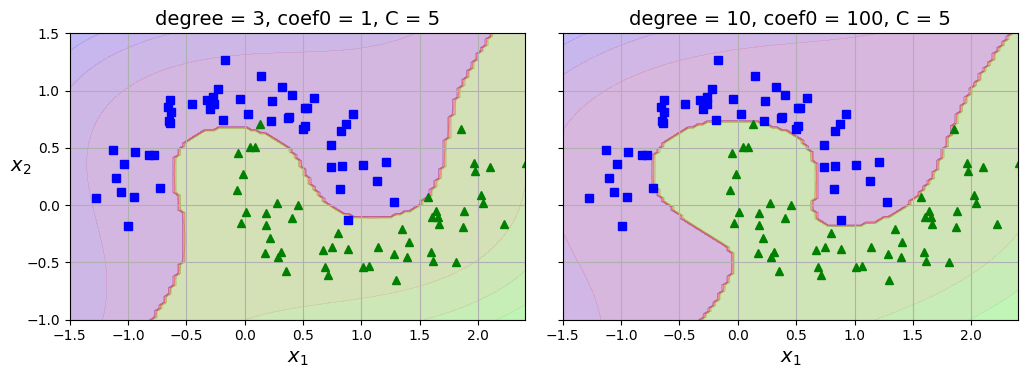

In [16]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree = 3, coef0 = 1, C = 5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree = 10, coef0 = 100, C = 5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()



```python
 poly100_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5))
 ```
 : This line defines a variable named poly100_kernel_svm_clf, which is a pipeline object that combines two steps: StandardScaler() and SVC(). The StandardScaler() step transforms the data by scaling each feature to have zero mean and unit variance. The SVC() step creates an SVM classifier with a polynomial kernel, specified by the kernel parameter. The degree parameter sets the degree of the polynomial kernel function, which is 10 in this case. The coef0 parameter controls how much the model is influenced by high-degree polynomials versus low-degree polynomials, which is 100 in this case. The C parameter is the regularization parameter that controls the trade-off between a large margin and a low classification error, which is 5 in this case.

```python
poly100_kernel_svm_clf.fit(X, y)
```
: This line trains the poly100_kernel_svm_clf model using the X features and y target labels, which are defined earlier in the web page context. The X features are the x and y coordinates of the data points, and the y target labels are the binary classes (0 or 1) of the data points.

```python
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey=True)
```
: This line creates a figure with two subplots for side-by-side comparison, using the matplotlib.pyplot library. The ncols parameter sets the number of columns of subplots, which is 2 in this case. The figsize parameter sets the width and height of the figure in inches, which is (10.5, 4) in this case. The sharey parameter makes the subplots share the same y-axis, which is True in this case.

```python
plt.sca(axes[0])
```
: This line sets the current axes to the first subplot, using the plt.sca() function.

```python
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
```
: This line calls a custom function named plot_predictions, which is defined earlier in the web page context. This function takes a model and a list of four values as input, and plots the model's predictions on a grid of points. The model is poly_kernel_svm_clf, which is another SVM classifier with a polynomial kernel, defined earlier in the web page context. The list of four values are the minimum and maximum values of the x and y axes, which are [-1.5, 2.45, -1, 1.5] in this case.

```python
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
```
: This line calls another custom function named plot_dataset, which is also defined earlier in the web page context. This function takes the X features, y target labels, and a list of four values as input, and plots the data points on the same axes. The list of four values are the same as the previous line, except for a slight difference in the maximum value of the x-axis, which is 2.4 instead of 2.45.

```python
 plt.title("degree = 3, coef0 = 1, C = 5")
 ```
 : This line sets the title of the first subplot, using the plt.title() function. The title shows the parameters of the poly_kernel_svm_clf model, which are degree = 3, coef0 = 1, and C = 5.

```python
plt.sca(axes[1])
```
: This line sets the current axes to the second subplot, using the same function as line 4.

```python
 plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
 ```
 : This line calls the same function as line 5, but with a different model as input. The model is poly100_kernel_svm_clf, which is the SVM classifier with a polynomial kernel that is defined and trained in line 1 and 2.

```python
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
```
: This line calls the same function as line 6, with the same input as line 6. It plots the data points on the second subplot.

```python
plt.title("degree = 10, coef0 = 100, C = 5")
```
: This line sets the title of the second subplot, using the same function as line 7. The title shows the parameters of the poly100_kernel_svm_clf model, which are degree = 10, coef0 = 100, and C = 5.

```python
plt.ylabel("")
```
: This line sets the y-axis label of the second subplot to an empty string, using the plt.ylabel() function. This is to avoid repeating the same label as the first subplot, since they share the same y-axis.

```python
save_fig("moons_kernelized_polynomial_svc_plot")
```
: This line calls another custom function named save_fig, which is defined earlier in the web page context. This function takes a figure name as input, and saves the figure as an image file with the same name. The figure name is "moons_kernelized_polynomial_svc_plot" in this case.

```python
plt.show()
```
: This line displays the final plot with both subplots, using the plt.show() function.

The purpose of the code is to illustrate how changing the parameters of the polynomial kernel affects the shape and complexity of the decision boundary. The data points are generated from a synthetic dataset called moons, which has two crescent-shaped clusters. The first subplot shows a model with a low-degree polynomial kernel, which produces a smooth and simple decision boundary. The second subplot shows a model with a high-degree polynomial kernel, which produces a wiggly and complex decision boundary. The code demonstrates how increasing the degree and coef0 parameters can lead to overfitting the data, while increasing the C parameter can reduce the margin and increase the classification error.

### Gaussian RBF Kernel

In [17]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel = "rbf", gamma = 5, C = 0.001))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

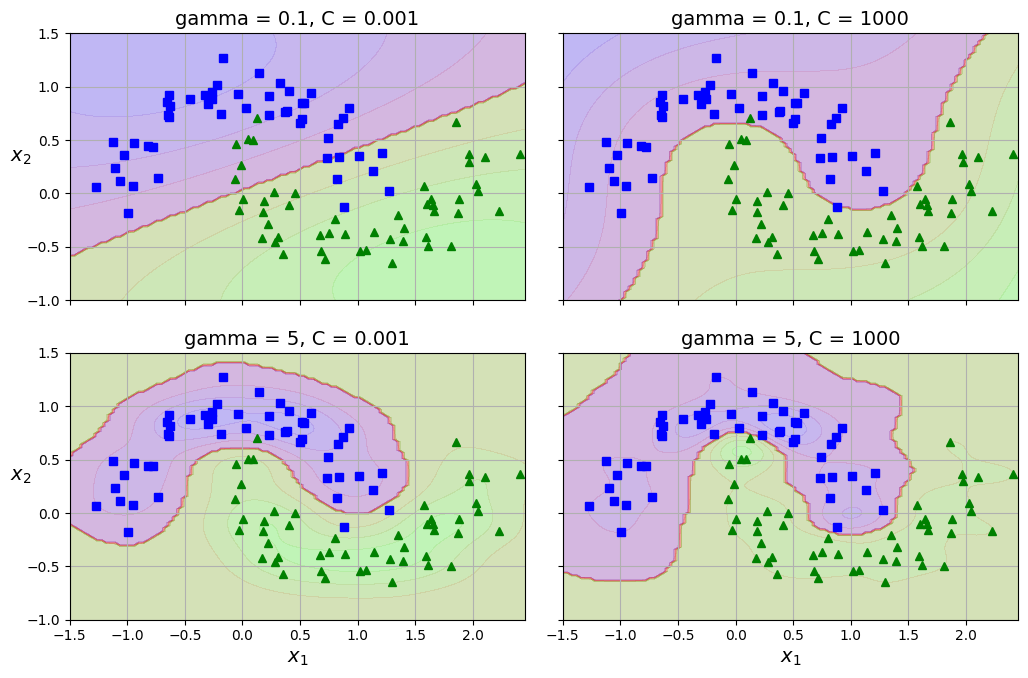

In [18]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
  rbf_kernel_svm_clf = make_pipeline(
      StandardScaler(),
      SVC(kernel = "rbf", gamma = gamma, C = C)
  )
  rbf_kernel_svm_clf.fit(X, y)
  svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10.5, 7), sharex = True, sharey = True)

for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i // 2, i % 2])
  plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
  plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
  gamma, C = hyperparams[i]
  plt.title(f"gamma = {gamma}, C = {C}")
  if i in (0, 1):
    plt.xlabel("")
  if i in (1, 3):
    plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()


```python
from sklearn.svm import SVC
```
: This line imports the SVC class from the sklearn.svm module, which is used to create an SVM classifier with an RBF kernel.

```python
gamma1, gamma2 = 0.1, 5
```
: This line defines two values for the gamma parameter of the RBF kernel, which controls the width of the Gaussian bell curve. The gamma1 value is 0.1, and the gamma2 value is 5.

```python
C1, C2 = 0.001, 1000
```
: This line defines two values for the C parameter of the SVM, which controls the trade-off between margin and error. The C1 value is 0.001, and the C2 value is 1000.

```python
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)
```
: This line defines a tuple of four tuples, each containing a pair of gamma and C values. These tuples are used to create four different SVM classifiers with different combinations of gamma and C values.

```python
svm_clfs = []
```
: This line defines an empty list to store the four SVM classifiers.

```python
for gamma, C in hyperparams:
  rbf_kernel_svm_clf = make_pipeline(
      StandardScaler(),
      SVC(kernel = "rbf", gamma = gamma, C = C)
  )
```
This block of code is a for loop that iterates over the four tuples in hyperparams. For each tuple, it creates an SVM classifier with an RBF kernel, using the make_pipeline() function to combine two steps: StandardScaler() and SVC(). The StandardScaler() step scales the data to have zero mean and unit variance, and the SVC() step creates the SVM classifier with an RBF kernel, using the gamma and C values from the current tuple. The fit() method is called to train the SVM classifier on the X features and y target labels, which are defined earlier in the web page context. The trained SVM classifier is appended to the svm_clfs list.

```python
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10.5, 7), sharex = True, sharey = True)
```
: This line creates a figure with four subplots for side-by-side comparison, using the matplotlib.pyplot library. The nrows parameter sets the number of rows of subplots, which is 2 in this case. The ncols parameter sets the number of columns of subplots, which is 2 in this case. The figsize parameter sets the width and height of the figure in inches, which is (10.5, 7) in this case. The sharex and sharey parameters make the subplots share the same x-axis and y-axis, respectively, which is True in this case.

```python
for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i // 2, i % 2])
  plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
  plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
  gamma, C = hyperparams[i]
  plt.title(f"gamma = {gamma}, C = {C}")
  if i in (0, 1):
    plt.xlabel("")
  if i in (1, 3):
    plt.ylabel("")
```

This block of code is another for loop that iterates over the four SVM classifiers in svm_clfs. For each SVM classifier, it sets the current subplot using the plt.sca() function, and calls two custom functions named plot_predictions() and plot_dataset(). The plot_predictions() function takes the SVM classifier and a list of four values as input, and plots the model's predictions on a grid of points. The plot_dataset() function takes the X features, y target labels, and a list of four values as input, and plots the data points on the same axes. The list of four values are the minimum and maximum values of the x and y axes, which are [-1.5, 2.45, -1, 1.5] in this case. The gamma and C values from the current tuple are used to set the title of the subplot, using the plt.title() function. The xlabel and ylabel are set to an empty string for some subplots, using the plt.xlabel() and plt.ylabel() functions. The save_fig() function is called to save the figure as an image file with the name "moons_rbf_svc_plot". Finally, the plt.show() function is called to display the final plot.

The purpose of the code is to illustrate how changing the gamma and C parameters of the RBF kernel affects the shape and complexity of the decision boundary. The data points are generated from a synthetic dataset called moons, which has two crescent-shaped clusters. The code demonstrates how increasing the gamma parameter can lead to overfitting the data, while increasing the C parameter can reduce the margin and increase the classification error. The code also shows how different combinations of gamma and C values can produce different decision boundaries, ranging from smooth and simple to wiggly and complex. The code is useful for tuning the hyperparameters of an SVM classifier with an RBF kernel.

#### SVM Classes and Computational complextity

- The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales
almost linearly with the number of training instances and the number of features.
Its training time complexity is roughly O(m × n). The algorithm takes longer if you
require very high precision. This is controlled by the tolerance hyperparameter ϵ
(called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine.

- The SVC class is based on the libsvm library, which implements an algorithm that
supports the kernel trick. The training time complexity is usually between O(m^2 ×
n) and O(m^3 × n). Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances), so
this algorithm is best for small or medium-sized nonlinear training sets.

- The SGDClassifier class also performs large margin classification by default, and its
hyperparameters–especially the regularization hyperparameters (alpha and penalty)
and the learning_rate–can be adjusted to produce similar results as the linear
SVMs.

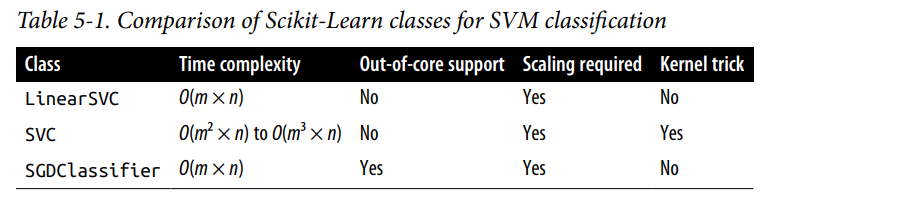

### SVM Regression

In [19]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon = 0.5, dual = True, random_state = 42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

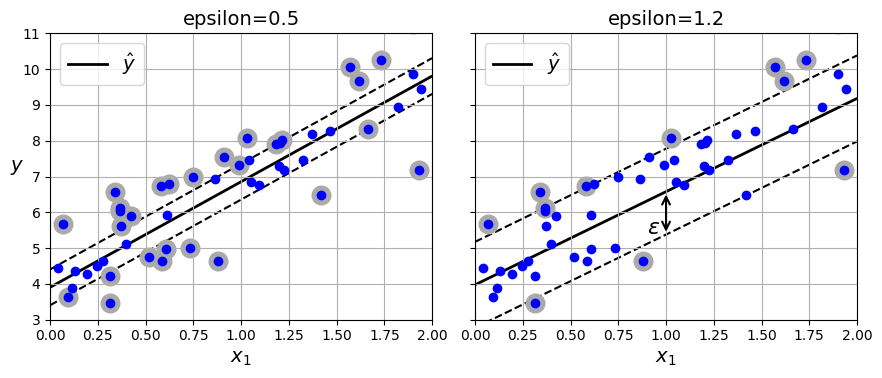

In [20]:
def find_support_vectors(svm_reg, X, y):
  y_pred = svm_reg.predict(X)
  epsilon = svm_reg[-1].epsilon
  off_margin = np.abs(y - y_pred) >= epsilon
  return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
  y_pred = svm_reg.predict(x1s)
  epsilon = svm_reg[-1].epsilon
  plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
  plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
  plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
  plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
              facecolors='#AAA', zorder=-1)
  plt.plot(X, y, "bo")
  plt.xlabel("$x_1$")
  plt.legend(loc="upper left")
  plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon= 1.2, dual = True, random_state = 42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

Reducing ϵ increases the number of support vectors, which regularizes the model.
Moreover, if you add more training instances within the margin, it will not affect the
model’s predictions; thus, the model is said to be ϵ-insensitive

In [21]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel = "poly", degree = 2, C = 0.01, epsilon = 0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

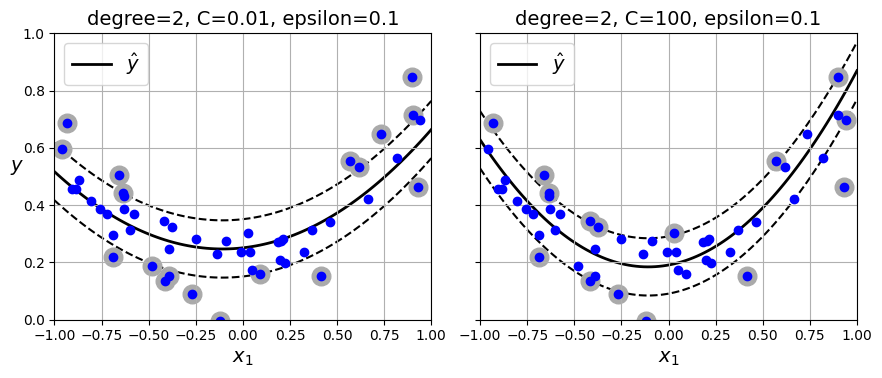

In [22]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

### SGDClassifier

In [23]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

[-12.52988101   1.94162342   1.84544824]


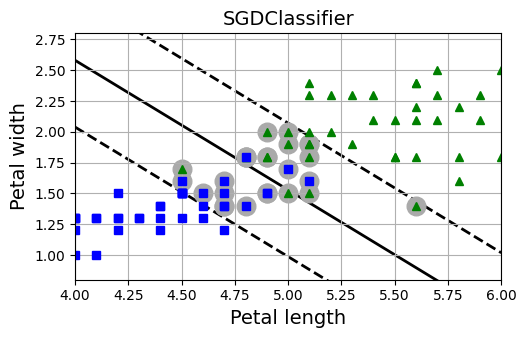

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = "hinge", alpha = 0.017, max_iter = 1000, tol = 1e-3,
                        random_state = 42)

sgd_clf.fit(X, y)

yr = y.ravel()
m = len(X)
t = np.array(y).reshape(-1, 1) * 2 - 1  # -1 if y == 0, or +1 if y == 1
X_b = np.c_[np.ones((m, 1)), X]   # Add bias input x0 = 1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("SGDClassifier")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()



**1. Importing libraries and loading data:**

- `X = iris.data[["petal length (cm)", "petal width (cm)"]].values` extracts the petal length and width features from the iris dataset and converts them into a NumPy array.
- `y = (iris.target == 2)` creates a label array indicating whether each iris belongs to the third class (`iris-virginica`).

**2. Defining and fitting the SGDClassifier:**

- `from sklearn.linear_model import SGDClassifier` imports the `SGDClassifier` class from scikit-learn.
- `sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)` defines an SGDClassifier object with specific parameters:
    - `loss="hinge"` specifies the hinge loss function suitable for binary classification.
    - `alpha=0.017` sets the learning rate.
    - `max_iter=1000` limits the maximum number of iterations.
    - `tol=1e-3` defines the tolerance for stopping the training.
    - `random_state=42` sets the random seed for ensuring reproducibility.
- `sgd_clf.fit(X, y)` trains the SGDClassifier model on the petal features and target labels.

**3. Preparing data for decision boundary visualization:**

- `yr = y.ravel()` flattens the label array.
- `m = len(X)` stores the number of data points.
- `t = np.array(y).reshape(-1, 1) * 2 - 1` converts the label array to a 2D array and applies a transformation:
    - `-1` if the label is 0,
    - `+1` if the label is 1.
- `X_b = np.c_[np.ones((m, 1)), X]` adds a bias term (column of ones) to the feature matrix X.
- `X_b_t = X_b * t` multiplies each row of the feature matrix by the corresponding transformed label.

**4. Extracting and storing support vectors:**

- `sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]` concatenates the intercept and coefficient values of the trained model.
- `support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()` identifies the data points that lie within the margin (distance < 1) of the hyperplane.
- `sgd_clf.support_vectors_ = X[support_vectors_idx]` stores the identified support vectors in the `support_vectors_` attribute of the model.

**5. Defining the decision boundary and plotting the results:**

- `sgd_clf.C = C` sets the `C` regularization parameter of the model, which was not specified previously.
- `plt.figure(figsize=(5.5, 3.2))` creates a plot with a specific size.
- `plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")` and `plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")` plot the data points of each class using different markers.
- `plot_svc_decision_boundary(sgd_clf, 4, 6)` plots the decision boundary of the SGDClassifier model within the specified x-axis range (4 to 6).
- `plt.xlabel("Petal length")`, `plt.ylabel("Petal width")`, and `plt.title("SGDClassifier")` set the labels and title for the plot.
- `plt.axis([4, 6, 0.8, 2.8])` defines the axes limits.
- `plt.grid()` adds a grid to the plot.
- `plt.show()` displays the plot.



